In [1]:
import matplotlib.pyplot as plt
import random
import math

# Data generation

Data has been generated using the condition = IF(X<=Y+50,0,1)

In [2]:
import pandas as pd

df = pd.read_csv('../resource/data-3.csv')
df.head()

,X1,X2,Y
0,50,70,1
1,11,1,0
2,9,27,0
3,86,80,1
4,12,36,0


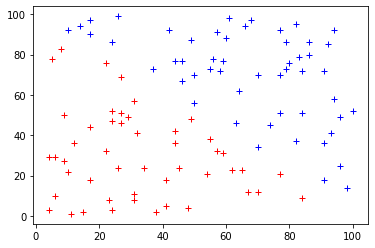

In [3]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "b+")

In [7]:
W = [random.random(), random.random()]
b = random.random()

print(W, b)

lr=1.0
activation_condition=0.5

[0.8770001600067936, 0.8753338431173269] 0.014892998188083206


In [8]:
epoch = 0
count_correct = 0

while count_correct < 100 :
    
    total_error = 0
    print(f"Epoch: {epoch}")
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > activation_condition:
            pred = 1
        
        error =  Y[i] - pred
        if error != 0:
            count_correct = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count_correct += 1

        print(f"[{X1[i]} , {X2[i]}] = {pred}")
    
    print(f"Loss: {total_error}")
    print("===------------------------------===")
    epoch += 1

Epoch: 0
[50 , 70] = 1
[11 , 1] = 1
[9 , 27] = 0
[86 , 80] = 0
[12 , 36] = 1
[34 , 24] = 1
[14 , 94] = 1
[6 , 10] = 1
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 1
[6 , 29] = 0
[23 , 8] = 0
[24 , 52] = 0
[45 , 24] = 0
[77 , 92] = 0
[56 , 78] = 1
[65 , 23] = 1
[61 , 98] = 1
[44 , 36] = 1
[26 , 99] = 0
[55 , 38] = 1
[58 , 72] = 0
[15 , 2] = 0
[57 , 91] = 1
[84 , 51] = 1
[82 , 95] = 1
[27 , 46] = 1
[31 , 8] = 0
[84 , 72] = 1
[96 , 49] = 0
[94 , 92] = 1
[27 , 51] = 1
[49 , 48] = 1
[80 , 76] = 0
[41 , 18] = 1
[54 , 21] = 1
[74 , 45] = 0
[9 , 50] = 1
[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 0
[38 , 2] = 1
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 2

[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 1
[6 , 29] = 0
[23 , 8] = 0
[24 , 52] = 0
[45 , 24] = 0
[77 , 92] = 0
[56 , 78] = 1
[65 , 23] = 1
[61 , 98] = 1
[44 , 36] = 0
[26 , 99] = 1
[55 , 38] = 0
[58 , 72] = 1
[15 , 2] = 0
[57 , 91] = 1
[84 , 51] = 0
[82 , 95] = 1
[27 , 46] = 1
[31 , 8] = 1
[84 , 72] = 1
[96 , 49] = 1
[94 , 92] = 1
[27 , 51] = 1
[49 , 48] = 0
[80 , 76] = 0
[41 , 18] = 1
[54 , 21] = 1
[74 , 45] = 0
[9 , 50] = 1
[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 0
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 0
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[9

[56 , 78] = 1
[65 , 23] = 1
[61 , 98] = 1
[44 , 36] = 1
[26 , 99] = 0
[55 , 38] = 1
[58 , 72] = 0
[15 , 2] = 0
[57 , 91] = 1
[84 , 51] = 1
[82 , 95] = 1
[27 , 46] = 1
[31 , 8] = 0
[84 , 72] = 1
[96 , 49] = 0
[94 , 92] = 1
[27 , 51] = 1
[49 , 48] = 1
[80 , 76] = 0
[41 , 18] = 1
[54 , 21] = 1
[74 , 45] = 0
[9 , 50] = 1
[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 0
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 1
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 0
[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 0
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 1
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 1
[50 , 56] = 1
[44 , 42] = 0
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 1
[48 , 4] = 0
[

[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 0
[66 , 94] = 1
[84 , 9] = 0
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 1
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 0
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 0
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 1
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 1
[8 , 83] = 0
Loss: 35.0
===------------------------------===
Epoch: 92
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 1
[86 , 80] = 0
[12 , 36] = 1
[34 , 24] = 1
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 0
[6 , 29] = 0
[23 , 8] = 0
[24 , 52] = 0
[45 , 24] = 0
[77 , 92] = 1
[56 , 78] = 1
[65 , 23] = 0
[61 , 98] = 1
[44 , 36] = 0
[26 , 99] = 1
[55 , 38] = 0
[58 , 72] = 1
[15 , 2] = 0
[57 , 91] = 1
[84 ,

[82 , 95] = 1
[27 , 46] = 1
[31 , 8] = 0
[84 , 72] = 1
[96 , 49] = 0
[94 , 92] = 1
[27 , 51] = 1
[49 , 48] = 1
[80 , 76] = 1
[41 , 18] = 0
[54 , 21] = 0
[74 , 45] = 0
[9 , 50] = 1
[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 0
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 1
[22 , 32] = 0
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 0
[5 , 78] = 1
[42 , 92] = 1
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 0
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 1
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 1
[8 , 83] = 0
Loss: 35.0
===------------------------------===
Epoch: 122


[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 0
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 1
[22 , 32] = 1
[27 , 69] = 0
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 0
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 1
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 1
[8 , 83] = 0
Loss: 36.0
===------------------------------===
Epoch: 151
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 1
[34 , 24] = 0
[14 , 94] = 0
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[

[56 , 78] = 1
[65 , 23] = 1
[61 , 98] = 1
[44 , 36] = 0
[26 , 99] = 1
[55 , 38] = 0
[58 , 72] = 1
[15 , 2] = 0
[57 , 91] = 1
[84 , 51] = 1
[82 , 95] = 1
[27 , 46] = 1
[31 , 8] = 0
[84 , 72] = 0
[96 , 49] = 1
[94 , 92] = 1
[27 , 51] = 1
[49 , 48] = 1
[80 , 76] = 0
[41 , 18] = 1
[54 , 21] = 0
[74 , 45] = 1
[9 , 50] = 1
[86 , 86] = 0
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 0
[42 , 92] = 1
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 0
[31 , 57] = 0
[66 , 94] = 1
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 0
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[

[79 , 73] = 1
[22 , 32] = 0
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 0
[5 , 78] = 1
[42 , 92] = 1
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 0
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 1
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 0
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 1
[8 , 83] = 0
Loss: 34.0
===------------------------------===
Epoch: 214
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 0
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 1
[6 , 29] = 0
[23 , 8] = 0
[24 , 52] = 0
[45 , 24] = 0
[77 , 92] = 0
[56 , 78] = 1
[65

[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 1
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 1
[77 , 21] = 0
[22 , 76] = 0
[8 , 83] = 0
Loss: 32.0
===------------------------------===
Epoch: 248
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 1
[86 , 80] = 1
[12 , 36] = 1
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 1
[6 , 29] = 0
[23 , 8] = 0
[24 , 52] = 0
[45 

[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 0
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 1
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 1
[77 , 21] = 0
[22 , 76] = 1
[8 , 83] = 0
Loss: 31.0
===------------------------------===
Epoch: 282
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 0
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 0
[82 , 37] = 1
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[32 , 41] = 1
[67 , 12] = 0
[6 , 29] = 0
[23

[77 , 51] = 0
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 0
[42 , 92] = 1
[37 , 73] = 0
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 0
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 1
[77 , 21] = 0
[22 , 76] = 1
[8 , 83] = 0
Loss: 30.0
===------------------------------===
Epoch: 316
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 0
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 1
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[70 , 34] = 1
[68 , 97] = 1
[

[86 , 86] = 1
[17 , 90] = 0
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 1
[10 , 92] = 1
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 0
[5 , 78] = 1
[42 , 92] = 1
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 0
[31 , 57] = 1
[66 , 94] = 0
[84 , 9] = 1
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 1
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 1
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 1
[8 , 83] = 0
Loss: 33.0
===------------------------------===
Epoch: 350
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 0
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 0
[82 , 37] = 0
[46 , 77] = 1
[44 , 77] = 1
[

[54 , 21] = 0
[74 , 45] = 1
[9 , 50] = 0
[86 , 86] = 1
[17 , 90] = 1
[77 , 51] = 1
[63 , 46] = 1
[100 , 52] = 1
[59 , 31] = 0
[10 , 92] = 1
[55 , 73] = 1
[38 , 2] = 0
[29 , 49] = 1
[79 , 73] = 0
[22 , 32] = 1
[27 , 69] = 1
[64 , 62] = 0
[46 , 67] = 1
[70 , 70] = 1
[24 , 86] = 1
[57 , 32] = 1
[92 , 85] = 1
[5 , 78] = 0
[42 , 92] = 0
[37 , 73] = 1
[60 , 88] = 1
[83 , 79] = 1
[17 , 97] = 1
[4 , 29] = 0
[96 , 25] = 1
[91 , 18] = 1
[77 , 70] = 1
[93 , 41] = 1
[26 , 24] = 1
[31 , 57] = 1
[66 , 94] = 1
[84 , 9] = 0
[62 , 23] = 0
[4 , 3] = 0
[98 , 14] = 0
[94 , 58] = 1
[59 , 77] = 1
[17 , 18] = 0
[79 , 86] = 1
[91 , 36] = 1
[10 , 22] = 0
[50 , 56] = 1
[44 , 42] = 1
[31 , 11] = 0
[70 , 12] = 1
[17 , 44] = 0
[48 , 4] = 0
[24 , 3] = 0
[41 , 5] = 0
[49 , 87] = 0
[77 , 21] = 1
[22 , 76] = 0
[8 , 83] = 1
Loss: 29.0
===------------------------------===
Epoch: 384
[50 , 70] = 0
[11 , 1] = 0
[9 , 27] = 0
[86 , 80] = 1
[12 , 36] = 0
[34 , 24] = 0
[14 , 94] = 1
[6 , 10] = 0
[91 , 72] = 1
[24 , 47] = 0
[8

# Result

The network has loss = 0 after 406 epochs

With the learning rate = 0.5 the netwrok takes 406 epochs to complete learning
with the learning rate = 1.0 the netwrok takes 398 (approx) epochs to complete learning

The learning rate has been taken to be 0.5 rather than 1.0 is to avoid overfitting the network

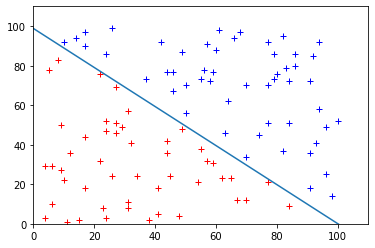

In [6]:
plt.figure()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "b+")
    
plt.xlim([0, 110])
plt.ylim([0, 110])

xintr=(activation_condition-b)/W[0]
yintr=(activation_condition-b)/W[1]

slope=-yintr/xintr
xx=plt.xlim()
yeq = []

for x in xx:
    yeq.append(slope*x+yintr)

plt.plot(xx,yeq)
plt.show()